In [1]:
import matplotlib.pyplot as plt
import matplotlib as mp
import cv2 
import numpy as np
from scipy import misc
import scipy
from PIL import Image, ImageFilter
from skimage import io,color, img_as_ubyte,img_as_float
import skimage
plt.ion()
plt.rcParams['image.cmap']='gray'

In [2]:
skimage.__version__,scipy.__version__,cv2.__version__,np.__version__

('0.19.1', '1.8.0', '4.5.5', '1.22.2')

**Binary image**

Binary image can have two values 0 or 1.  They are simple to process and analyze. A binary image is using an appropriate segmentation of a gray scale image or simply by thresholding. In binary vision segmentation and thresholding are synonymous

<b>Thresholding convert a gray-scale image to binary image so that the object of interest are separated from the background </b>
characteristic or indicator function
$$ b(x,y)=\lgroup_{1, \ \ if \ g(x,y) \ge \ T \\}^{0, \ \ if \ g(x,y) \lt \ T}$$

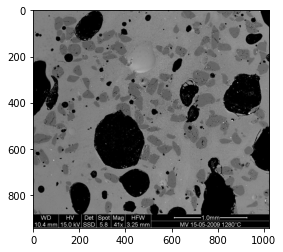

In [3]:
bubbles=skimage.io.imread('../images/bubbles.jpg')
plt.imshow(bubbles)

hitogram can help you decide where you would like to threshold

In [4]:
def plot_hist(img,ylim):
    fig, ax = plt.subplots(1, 1)
    ax.hist(img.ravel(), bins=256, range=[0, 255])
    ax.set_xlim(0, 257);
    ax.set_ylim(0,ylim)

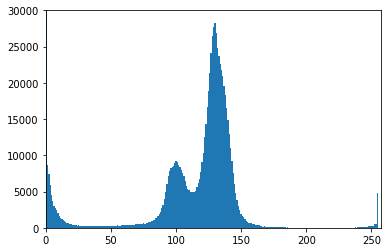

In [5]:
plot_hist(bubbles,ylim=30000)

# Thresholding

In [6]:
def Binary_image(image,threshold=None):
    return np.where(image<threshold,1,0)

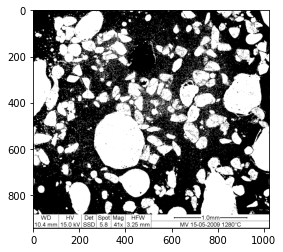

In [7]:
binary=Binary_image(bubbles,threshold=120)
plt.imshow(binary)

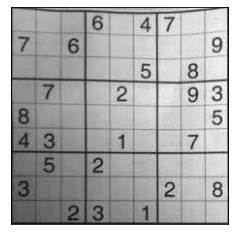

In [8]:
sudoku=cv2.imread('../images/sudoku.jpeg',cv2.IMREAD_GRAYSCALE)
plt.imshow(sudoku),plt.xticks([]),plt.yticks([])
plt.show()

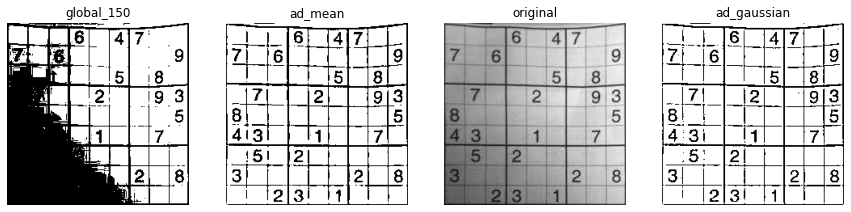

In [9]:
# global threshold
ret,global_150=cv2.threshold(sudoku,100,200,cv2.THRESH_BINARY)

"""
 adatptive threshold with the mean method compute the mean value of neighbourhold area and then
  uses it as the threshold  value. 
  
  We use cv2.THRESH_BINARY to indicate that any pixel intensity greater than the Threshold in the neighborhood should 
  be set to 200, otherwise it should be set to 0
 
 The neighborhood size must be odd: here we are choosing 13 indicating that we are going to examine 13 × 13 pixel 
 regions of the image.
 
 C=9 - It is just a constant which is subtracted from the mean or weighted mean calculated
"""

ad_mean=cv2.adaptiveThreshold(sudoku,200,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,13,9)

# adatptive threshold using the weighted sum value of neighbourhold area where weights are a gaussian window as a
# threshold
ad_gaussian=cv2.adaptiveThreshold(sudoku,200,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,13,9)


imgs=[global_150,ad_mean,sudoku,ad_gaussian]
t=[ 'global_150','ad_mean','original','ad_gaussian' ]

f,axes=plt.subplots(nrows=1,ncols=4,figsize=(15,10))
axes=axes.ravel()
for ax in axes:
    ax.axis('off')
    
for i,c in enumerate(imgs):
    axes[i].imshow(c)
    axes[i].set_title(t[i])



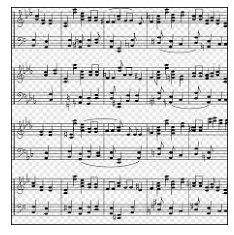

In [10]:
music=cv2.imread('../images/piano1.jpeg',cv2.IMREAD_GRAYSCALE)
plt.imshow(music),plt.xticks([]),plt.yticks([])
plt.show()

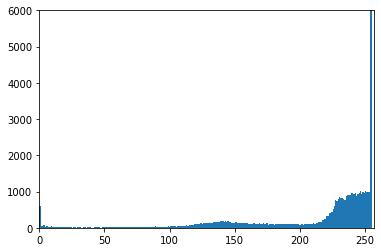

In [11]:
plot_hist(music,ylim=6000)

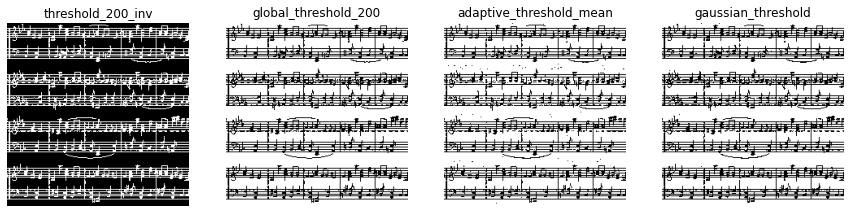

In [12]:
ret,threshold_200=cv2.threshold(music,200,255,cv2.THRESH_BINARY)

ret,threshold_200_inv=cv2.threshold(music,200,255,cv2.THRESH_BINARY_INV)
adaptive_threshold_mean=cv2.adaptiveThreshold(music,2,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,21,13)
gaussian_threshold=cv2.adaptiveThreshold(music,5,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,29,9)

thresholds=[threshold_200_inv,threshold_200,adaptive_threshold_mean,gaussian_threshold]
titles=['threshold_200_inv','global_threshold_200','adaptive_threshold_mean','gaussian_threshold']

f,axes=plt.subplots(nrows=1,ncols=4,figsize=(15,10))
for ax in axes:
    ax.axis('off')
for i,img in enumerate(thresholds):
    axes[i].imshow(thresholds[i])
    axes[i].set_title(titles[i])
    

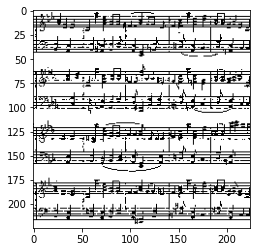

In [13]:
thres=skimage.filters.threshold_sauvola(music)
plt.imshow(music>thres)

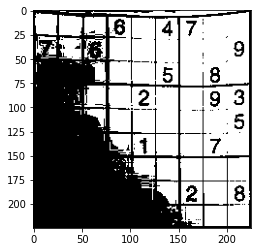

In [14]:
TT=skimage.filters.threshold_mean(sudoku)
plt.imshow(sudoku>TT)

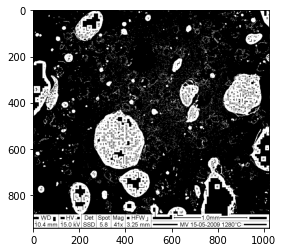

In [15]:
thres=skimage.filters.threshold_sauvola(bubbles)
plt.imshow(bubbles<thres)

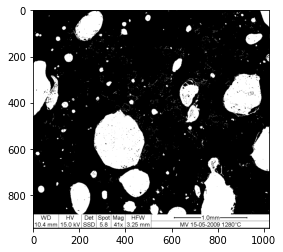

In [16]:
TT=skimage.filters.threshold_minimum(bubbles)
plt.imshow(bubbles<TT)

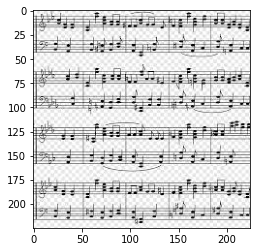

In [17]:
img1=skimage.io.imread('../images/piano1.jpeg')
img1=cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
#img_blur=cv2.GaussianBlur(img1,(5,5),0,0)
plt.imshow(img1)

In [18]:
img1.shape

(225, 224)

# Otsu’s Binarization 

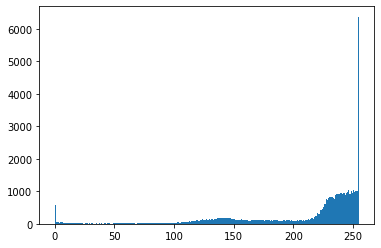

In [19]:
plt.hist(img1.ravel(),256)
plt.show()

178 178.0


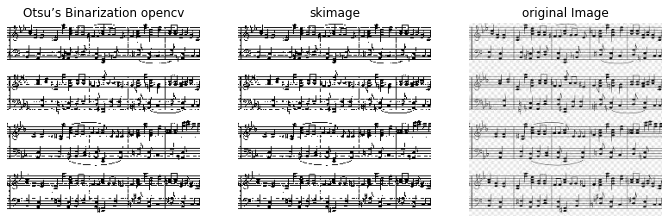

In [20]:
ret,th1=cv2.threshold(img1,0,125,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
t=skimage.filters.threshold_otsu(img1)
print(t,ret)
plt.figure(figsize=(20,15))

plt.subplot(151),plt.imshow(th1),plt.title('Otsu’s Binarization opencv'),plt.axis('off')
plt.subplot(152),plt.imshow(img1>t),plt.title('skimage'),plt.axis('off')
plt.subplot(153),plt.imshow(img1),plt.title('original Image'),plt.axis('off')
plt.show()

# An image transform is a function that accepts an image as its input and outputs a modified image

**POINT (PIXEL) PROCESSING**

Brightness of an image refers to the overall lightness or darkness of the image, while contrast is the difference between maximum and minimum pixel intensity in an image.  Image enhancement is the improvement of image quality without having a
knowledge of source of degradation.


A transformation is a function that maps set of inputs to set of outputs so that each input has has exactly one output. 
In the case of images, a transformation takes the pixel intensities of the image as an input and creates a new image where the corresponding pixel intensities are defined by the transformation.


An image processing operation or transformation typically defines a new image $g$ in terms of an input image $f$. An image is represented by $f(x, y)$, and it indicates the intensity at position $(x, y)$. 
**The point operation is a spatial domain approach, and it can be used for image enhancement.**
The point operation is generally represented as:

$$ g(x,y)=T(f(x,y))$$




In [21]:
coins=skimage.io.imread('../images/coins.png')

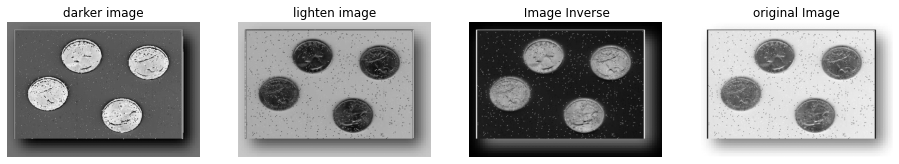

In [22]:
darker_img=np.uint8(np.clip(coins-140,0,255))
lighten_img=np.uint8(np.clip(coins+200,0,255))
ivert_img=255-coins

plt.figure(figsize=(20,15))

plt.subplot(151),plt.imshow(darker_img),plt.title('darker image'),plt.axis('off')
plt.subplot(152),plt.imshow(lighten_img),plt.title('lighten image'),plt.axis('off')
plt.subplot(153),plt.imshow(ivert_img),plt.title(' Image Inverse'),plt.axis('off')
plt.subplot(154),plt.imshow(coins),plt.title('original Image'),plt.axis('off')
plt.show()

In [23]:
astronaut =skimage.data.astronaut()

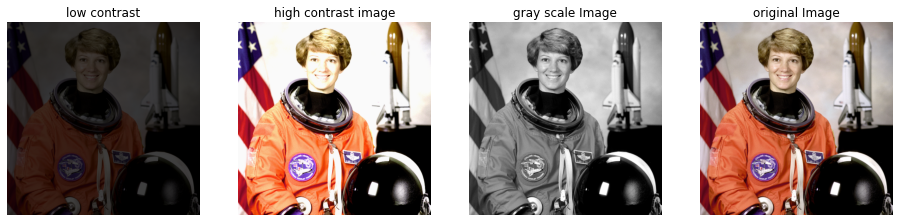

In [24]:
low_contrast=np.uint8(np.clip(astronaut*.25,0,250))
high_contrast=np.uint8(np.clip(astronaut*1.5,0,250))
gray_img=astronaut @ [0.71, 0.73, 0.72]
plt.figure(figsize=(20,10))

plt.subplot(151),plt.imshow(low_contrast),plt.title('low contrast'),plt.axis('off')
plt.subplot(152),plt.imshow(high_contrast),plt.title('high contrast image'),plt.axis('off')
plt.subplot(153),plt.imshow(gray_img),plt.title('gray scale Image'),plt.axis('off')
plt.subplot(154),plt.imshow(astronaut),plt.title('original Image'),plt.axis('off')
plt.show()

# Linear Shift-Invariant (time-invariant) Systems

An LSI system $f(x)$ has two essential properties:

1. Linearity: $f(ax + by) = af(x) + bf(y)$, that is, it obeys linear superposition.

2. Shift-invariance:  means that if we shift the input in time (or shift the entries in a vector) then the output is shifted by the same amount.  if $f(x(t)) = y(t)$, shift invariance means that $f(x(t -T )) = y(t -T )$.

# Convolution
Another way to think about LSI systems is as resulting from a convolution between the input and the impulse response. Any LSI turns out to be performing convolution. In convolution the impulse response is referred to as a filter.

# Convolution Operation
In its most general form convolution is a mathematical operator which takes two functions f and g and produces a third function s. It is the overlap of f and g as g is shifted over f and is defined as
$$ s(t)=(f*g)(n)=\int_{-\infty}^{\infty}f(m)g(n-m)dm $$

Convolutions are often used for filtering.
```The convolution operation is denoted with an asterisk```

In CNNs terminology, the first argument f to the convolution is often referred to as the input and the second argument g as the convolution kernel or a filter
kernel. The output is sometimes referred to as the feature map.

Convolution is commutative  so it can be written as

$$ s(t)=(f*g)(n)=\int_{-\infty}^{\infty}f(n-m)g(m)dm $$
# Discrete Convolution
If we assume that f and g are defined only on integer n then we can define the discrete convolution as
$$ s(t)=(f*g)(n)=\sum_{m=-\infty}^{\infty}f(m)g(n-m) $$


# 2-Dimensional Convolution

Let $I$ be our $2D$ image (input) and  and $K$ a kernel of size $m \times n$ . The image $I$ is convolved with the filter $K$ and produces the <b>feature map S</b>.
The convolution operation denoted by $I*K$ is given as
$$ S(i,j)=(I * K)(i,j)=\sum_{m}\sum_{n}I(m,n)K(i-m,j-n)=\sum_{m}\sum_{n}I(i-m,j-n) K(m,n) $$ 

where $I(i,j)$  denote the pixel at location (i, j) in the input image

``` NOTE: what most machine learning libraries implement are more accurately described as cross-correlations but instead they call it Convolution```


# The Cross-Correlation Operation
The cross-correlation operation for I and K is defined as

$$ S(i,j)=(I * K)(i,j)=\sum_{m}\sum_{n}I(m,n)K(i+m,j+n)=\sum_{m}\sum_{n}I(i+m,j+n) K(m,n) $$ 

In [25]:
img=skimage.io.imread('../images/lady.jfif')
gray_img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

C:\Users\arize\AppData\Local\Temp/ipykernel_11064/1776144557.py:2: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  con1=scipy.ndimage.filters.convolve(gray_img,kernel)


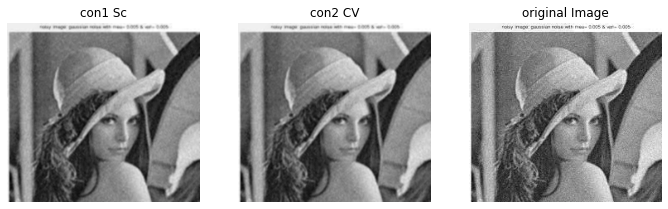

In [26]:
kernel=np.array([[1/16,1/8,1/16],[1/8,1/4,1/16],[1/16,1/8,1/16]])
con1=scipy.ndimage.filters.convolve(gray_img,kernel)
#con1=scipy.signal.convolve2d(gray_img,kernel)
# cv2.filter2D(), convolve a kernel with an image
con2=cv2.filter2D(gray_img,-1,kernel)

plt.figure(figsize=(20,20))
plt.subplot(151),plt.imshow(con1),plt.title('con1 Sc'),plt.axis('off')
plt.subplot(152),plt.imshow(con2),plt.title('con2 CV'),plt.axis('off')
plt.subplot(153),plt.imshow(gray_img),plt.title('original Image'),plt.axis('off')
plt.show()

# Image Filtering
Image filtering is a process to modify the pixels of an image based on some function of a local neighbourhood of the pixel (neighbourhood operation). Image filtering is used to remove noise, sharpen contrast or highlight contours of the image. An image filter is a function that accepts an image as its input and outputs a modified image 

# AVERAGING AN IMAGE (BOX FILTER) OR MEAN FILTER
A box blur (also known as a box linear filter) is a spatial domain linear filter in which each pixel in the resulting image has a value equal to the average value of its neighboring pixels in the input image. It is a form of low-pass ("blurring") filter.
[Wikipedia](https://en.wikipedia.org/wiki/Box_blur). It computes the local average of the pixel intensities at any
specific point


has positive entries (kernel weight) that sum to 1. Replaces each pixel with an average of its neighborhood. Since all weights are equal, it is called a BOX filter

$$kernel=\frac{1}{25} \left[ \begin{array}{cccc} 1&1&1&1&1\\ 1&1&1&1&1\\ 1&1&1&1&1\\ 1&1&1&1&1\\ 1&1&1&1&1\end{array} \right]$$



Averaging attenuates noise (reduces the variance)

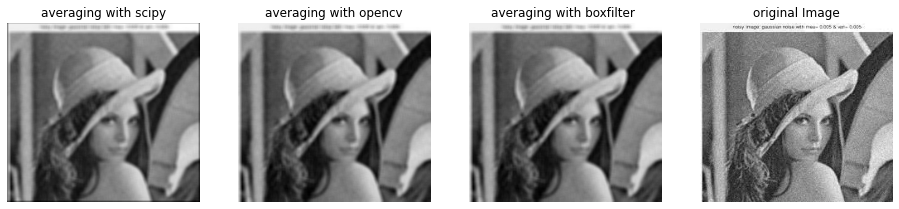

In [27]:
kernel=np.ones((5,5))/25
con1=scipy.signal.convolve2d(gray_img,kernel,mode='same')
con2=cv2.filter2D(gray_img,-1,kernel)
con3=cv2.boxFilter(gray_img,-1,(5,5))

plt.figure(figsize=(20,20))
plt.subplot(151),plt.imshow(con1),plt.title('averaging with scipy'),plt.axis('off')
plt.subplot(152),plt.imshow(con2),plt.title('averaging with opencv'),plt.axis('off')
plt.subplot(153),plt.imshow(con3),plt.title('averaging with boxfilter '),plt.axis('off')
plt.subplot(154),plt.imshow(gray_img),plt.title('original Image'),plt.axis('off')
plt.show()


The mean filter effectively removed the noise but in the process blurred the image

# Gaussian filter : FUZZY FILTER
A Gaussian filter is used as a smoothing filter. The standard deviation $\sigma$ controls the amount of smoothing. For larger standard deviations, larger kernels are required in order to accurately perform the Gaussian smoothing



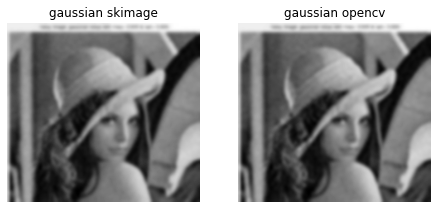

In [29]:
gaussian=cv2.GaussianBlur(gray_img,(9,9),2)
#gau=skimage.filters.gaussian(gray_img,sigma=2)
gau=scipy.ndimage.gaussian_filter(gray_img,sigma=2)
plt.figure(figsize=(20,20))
plt.subplot(151),plt.imshow(gau),plt.title('gaussian skimage'),plt.axis('off')
plt.subplot(152),plt.imshow(gaussian),plt.title('gaussian opencv'),plt.axis('off')
plt.show()

# Median filtering

A Median filter is a non-linear filter that replaces each pixel in a neighborhood with the median pixel intensity in that neighborhood. The median filter is commonly used in removing salt-and-pepper noise and impulse
noise. Salt-and-pepper noise is characterized by black and white spots randomly distributed in an image.

In [30]:
scipy.ndimage.median_filter

<function scipy.ndimage._filters.median_filter(input, size=None, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)>

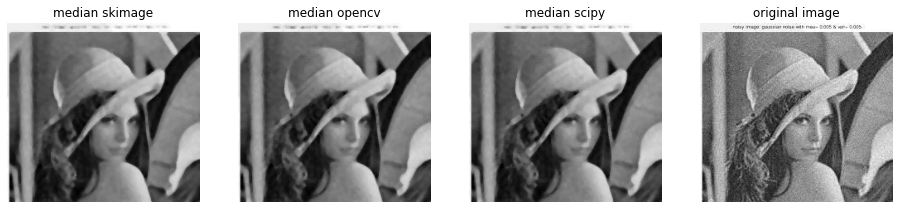

In [31]:
median=cv2.medianBlur(gray_img,ksize=5)
neighbourhood=skimage.morphology.disk(3)
median_skimage=skimage.filters.median(gray_img,neighbourhood)
#median_scipy=scipy.ndimage.filters.median_filter(gray_img,size=5,mode='reflect')

median_scipy=scipy.ndimage.median_filter(gray_img,size=5,mode='reflect')
plt.figure(figsize=(20,15))
plt.subplot(151),plt.imshow(median_skimage),plt.title('median skimage'),plt.axis('off')
plt.subplot(152),plt.imshow(median),plt.title('median opencv'),plt.axis('off')
plt.subplot(153),plt.imshow(median_scipy),plt.title('median scipy'),plt.axis('off')
plt.subplot(154),plt.imshow(gray_img),plt.title('original image'),plt.axis('off')
plt.show()


**Max Filter**

This filter enhances the bright points in an image. It replaces each pixel in a neighborhood with the max pixel intensity in that neighborhood 



C:\Users\arize\AppData\Local\Temp/ipykernel_11064/649988234.py:1: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  max_filter=scipy.ndimage.filters.maximum_filter(gray_img,size=3,mode='reflect')


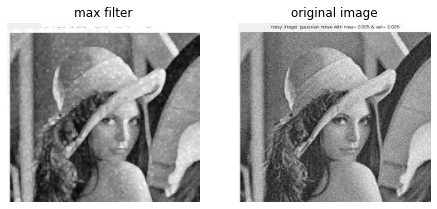

In [32]:
max_filter=scipy.ndimage.filters.maximum_filter(gray_img,size=3,mode='reflect')

plt.figure(figsize=(20,15))
plt.subplot(151),plt.imshow(max_filter),plt.title('max filter'),plt.axis('off')
plt.subplot(152),plt.imshow(gray_img),plt.title('original image'),plt.axis('off')
plt.show()


# Bilateral filter
A bilateral filter is an edge-preserving and an effective noise reducing filter. It averages pixels based on their spatial closeness and radiometric similarity.

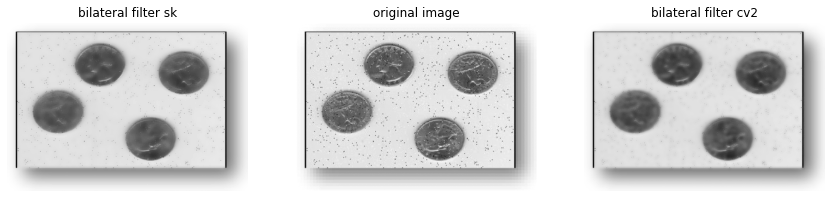

In [33]:
bilateral_filter=skimage.restoration.denoise_bilateral(coins,sigma_spatial=13,win_size=15, mode='reflect')
b_filter=cv2.bilateralFilter(coins,d=15,sigmaSpace=75,sigmaColor=75)
plt.figure(figsize=(25,20))
plt.subplot(151),plt.imshow(bilateral_filter),plt.title('bilateral filter sk'),plt.axis('off')
plt.subplot(152),plt.imshow(coins),plt.title('original image'),plt.axis('off')
plt.subplot(153),plt.imshow(b_filter),plt.title('bilateral filter cv2'),plt.axis('off')
plt.show()


# Log Transformation

If the intensities in the image range from $[0, L]$ then the log transformation at (i; j) is given by

$$\frac{L}{log \ (1+|I_{max}|)} log(1+I_{i,j}) $$ where

In [34]:
low_contrast=np.uint8(np.clip(astronaut*.25,0,250))
low_contrast=cv2.cvtColor(low_contrast,cv2.COLOR_RGB2GRAY)

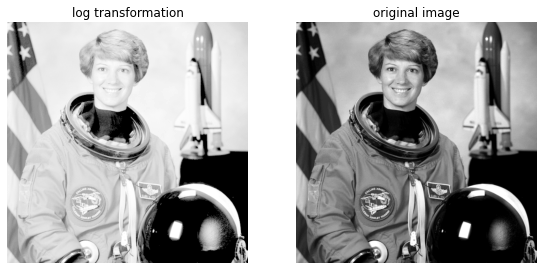

In [35]:
def log_tra(img):
    de=np.log(1+np.max(np.abs(img)))
    nu=255*np.log(1+img)
    return nu/de
img=log_tra(low_contrast)
plt.figure(figsize=(25,20))
plt.subplot(151),plt.imshow(img),plt.title('log transformation'),plt.axis('off')
plt.subplot(152),plt.imshow(low_contrast),plt.title('original image'),plt.axis('off')
plt.show()

# Image enhancement using derivates

Changes in intensity can be measured using the first or second derivative since Edges are a set of points in an image where there is a change of intensity between one side of that point and the other so we can measure these changes using their first or second derivatives

Examples of 1st Order image derivatives  filters are Sobel,
Prewitt, Sharr etc. An example of 2nd Order derivatives is the Laplacian:

In [36]:
def plot_comparison(original, filtered_sk,filtered_cv, filter_name_sk, filter_name_cv):

    fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(15,7))
    ax1.imshow(original)
    ax1.set_title('original')
    ax1.axis('off')
   
    ax2.imshow(filtered_sk)
    ax2.set_title(filter_name_sk)
    ax2.axis('off')
    
    ax3.imshow(filtered_cv)
    ax3.set_title(filter_name_cv)
    ax3.axis('off')

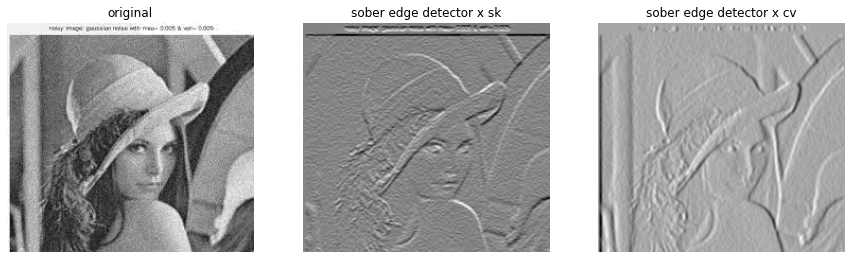

In [37]:
img_c_x=cv2.Sobel(gray_img,cv2.CV_64F ,dx=1,dy=0,ksize=5)
img_sk_x=skimage.filters.sobel_h(gray_img)
plot_comparison(gray_img,img_sk_x,img_c_x,'sober edge detector x sk','sober edge detector x cv')

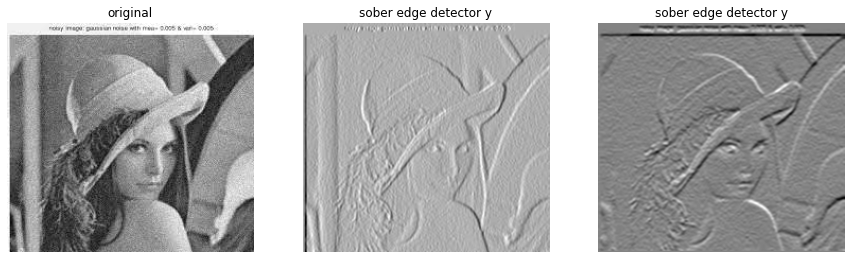

In [38]:
img_c_y=cv2.Sobel(gray_img,cv2.CV_64F,dx=0,dy=1,ksize=5)
img_sk_y=skimage.filters.sobel_v(gray_img)
plot_comparison(gray_img,img_sk_y,img_c_y,'sober edge detector y','sober edge detector y')

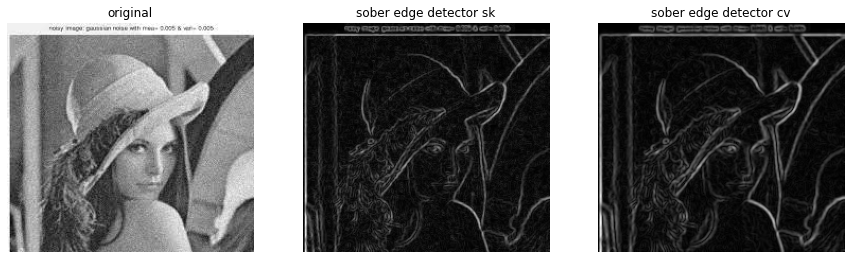

In [39]:
magnitude_c=np.sqrt(img_c_x**2+img_c_y**2)
magnitude_sk=np.sqrt(img_sk_x**2+img_sk_y**2)
plot_comparison(gray_img,magnitude_sk,magnitude_c,'sober edge detector sk','sober edge detector cv')

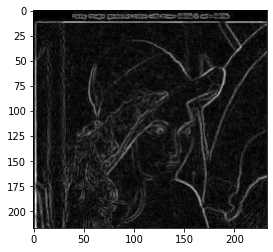

In [40]:
sobel_img=skimage.filters.sobel(gray_img)
plt.imshow(sobel_img)

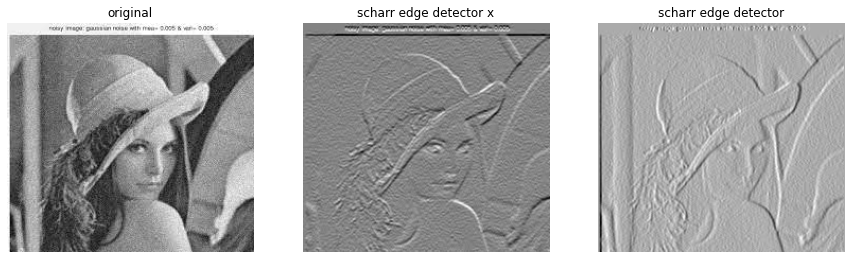

In [41]:
img_c_x=cv2.Scharr(gray_img,cv2.CV_64F,dx=1,dy=0)
img_sk_x=skimage.filters.scharr_h(gray_img)
plot_comparison(gray_img,img_sk_x,img_c_x,'scharr edge detector x','scharr edge detector')

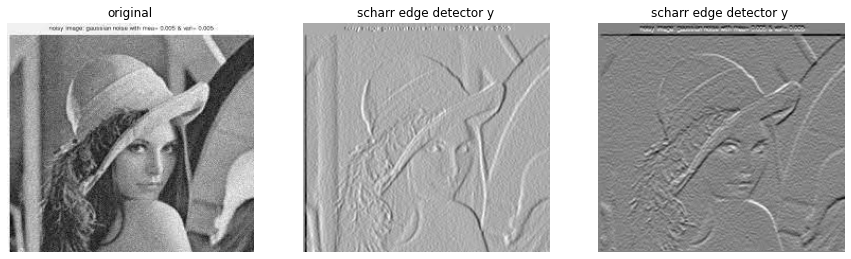

In [42]:
img_c_y=cv2.Scharr(gray_img,cv2.CV_64F ,dx=0,dy=1)
img_sk_y=skimage.filters.scharr_v(gray_img)
plot_comparison(gray_img,img_sk_y,img_c_y,'scharr edge detector y','scharr edge detector y ')

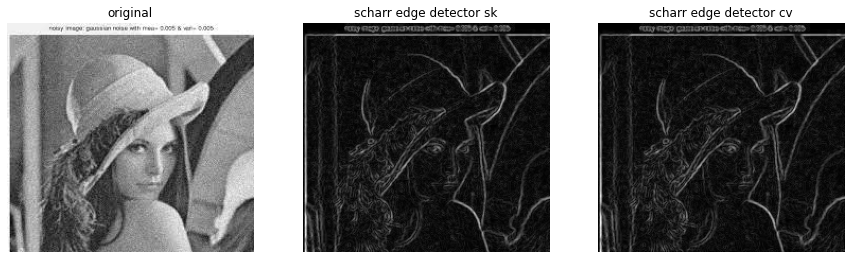

In [43]:
edge_gradient_magnitude_c=np.sqrt(img_c_x**2+img_c_y**2)
magnitude_sk=np.sqrt(img_sk_x**2+img_sk_y**2)
plot_comparison(gray_img,magnitude_sk,edge_gradient_magnitude_c,'scharr edge detector sk','scharr edge detector cv')

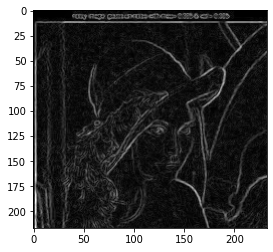

In [44]:
sobel_img=skimage.filters.scharr(gray_img)
plt.imshow(sobel_img)

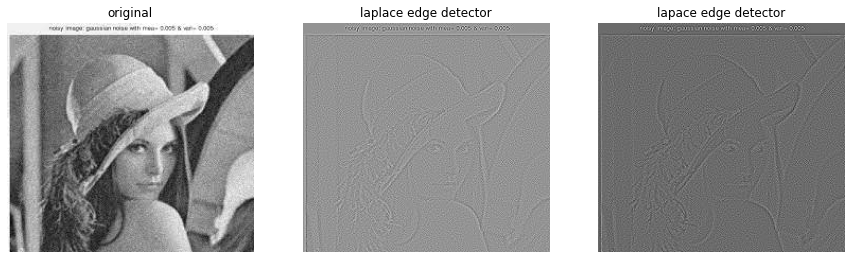

In [45]:
img_c=cv2.Laplacian(gray_img,cv2.CV_64F)
img_sk=skimage.filters.laplace(gray_img)
plot_comparison(gray_img,img_sk,img_c,'laplace edge detector','lapace edge detector')

# Canny Edge Detection

The Canny edge detector has 5 steps:

1 noise reduction with a Gaussian filter,

2 compute the intensity gradients,

3 non-maximum suppression,

4 double threshold,

5 edge tracking by hysteresis

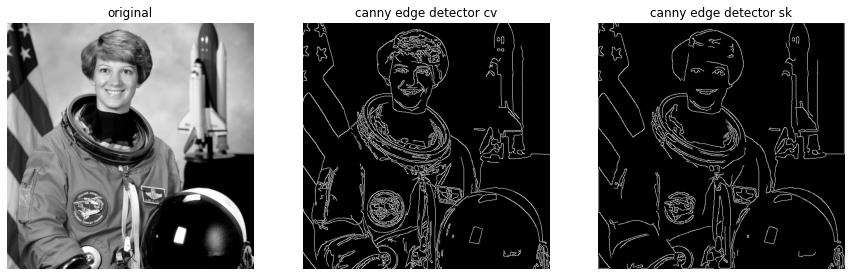

In [46]:
gray_astronaut=cv2.cvtColor(astronaut, cv2.COLOR_RGB2GRAY)
edge1=cv2.Canny(gray_astronaut,70,200,L2gradient=True)
edge2=skimage.feature.canny(gray_astronaut,low_threshold=70,high_threshold=200)
plot_comparison(gray_astronaut,edge1,edge2,'canny edge detector cv','canny edge detector sk' )

# Morphological Transformations

Morphological image processing operations are operations based on the image shape. It is normally performed on gray scale or binary images. Applying morphological operations on an image needs two inputs, the original image and the structuring element or kernel
which decides the nature of operation. In a morphological operation, the value of each pixel in the output image is based on a comparison of the corresponding pixel in the input image with its neighbors.

The basic morphological transformations are called dilation and erosion


# EROSION

erosion removes pixels on object. it shrinks image regions. The number of pixels added or removed from the objects in an image depends on the size and shape of the structuring element used to process the image.


The value of the output pixel is the minimum value of all pixels in the neighborhood. In a binary image, a pixel is set to 0 if any of the neighboring pixels have the value 0. A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

In [47]:
data=skimage.data.shepp_logan_phantom()

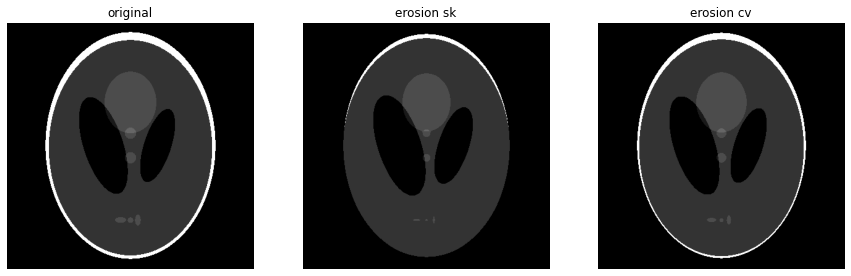

In [48]:
kernel=np.ones((3,3),np.uint8)
dist=skimage.morphology.disk(3)
er1=cv2.erode(data,kernel)
er2=skimage.morphology.erosion(data,dist)
plot_comparison(data,er2,er1,'erosion sk','erosion cv')

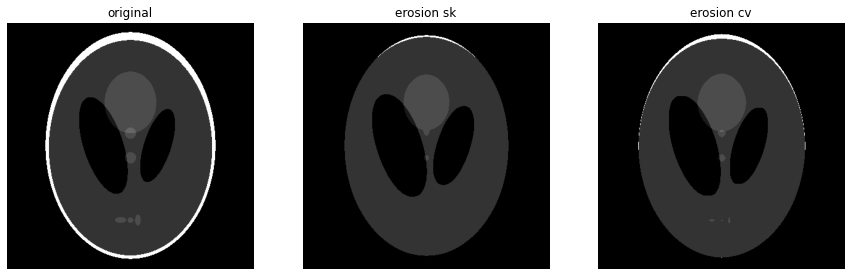

In [49]:
kernel=np.ones((6,6),np.uint8)
dist=skimage.morphology.disk(5)
er1=cv2.erode(data,kernel)
er2=skimage.morphology.erosion(data,dist)
plot_comparison(data,er2,er1,'erosion sk','erosion cv')

Notice how the white boundary of the image disappears or gets eroded as we increase the size of the disk or kernel.

# Dilation


dilation grow image regions by adding pixels to the boundaries of objects. It enlarges bright regions and shrinks dark regions.

The value of the output pixel is the maximum value of all pixels in the neighborhood. In a binary image, a pixel is set to 1 if any of the neighboring pixels have the value 1,that is a pixel element is ’1’ if atleast one pixel under the kernel is ’1’. So the size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it.

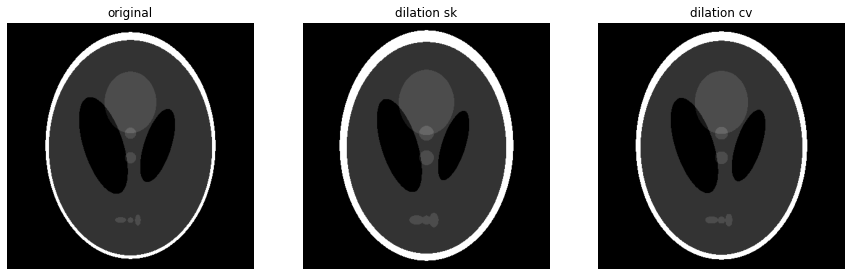

In [50]:
kernel=np.ones((3,3),np.uint8)
dist=skimage.morphology.disk(3)
dil1=cv2.dilate(data,kernel)
dil2=skimage.morphology.dilation(data,dist)
plot_comparison(data,dil2,dil1,'dilation sk','dilation cv')

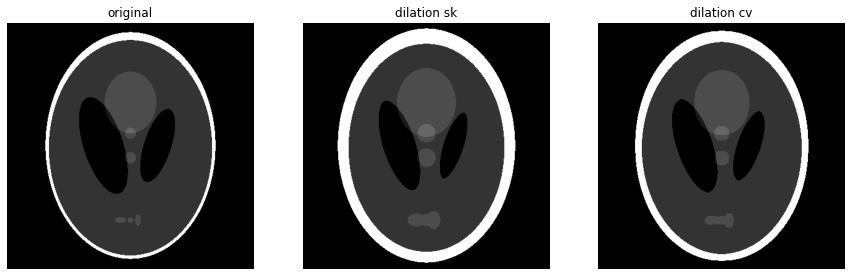

In [51]:
kernel=np.ones((6,6),np.uint8)
dist=skimage.morphology.disk(6)
dil1=cv2.dilate(data,kernel)
dil2=skimage.morphology.dilation(data,dist)
plot_comparison(data,dil2,dil1,'dilation sk','dilation cv')

Notice how the white boundary of the image enlarges or gets dilated as we increase the size of the disk or kernel and also a decrease in size of the two black ellipses in the centre

# # Opening
Opening is just another name of erosion followed by dilation. It is useful in removing noise

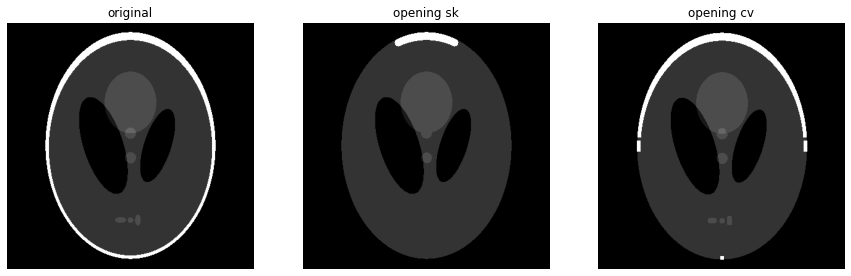

In [52]:
kernel=np.ones((6,6),np.uint8)
dist=skimage.morphology.disk(6)
open1=cv2.morphologyEx(data,cv2.MORPH_OPEN,kernel)
open2=skimage.morphology.opening(data,dist)
plot_comparison(data,open2,open1,'opening sk','opening cv')

# Closing
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground
objects, or small black points on the object 

In [53]:
phantom=data.copy()
phantom[10:30, 200:205] = 0

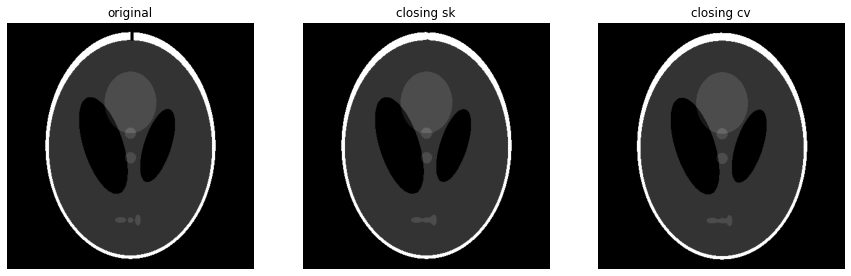

In [54]:
kernel=np.ones((6,6),np.uint8)
dist=skimage.morphology.disk(6)
cl1=cv2.morphologyEx(phantom,cv2.MORPH_CLOSE,kernel)
cl2=skimage.morphology.closing(phantom,dist)
plot_comparison(phantom,cl2,cl1,'closing sk','closing cv')

# White tophat
The white_tophat of an image is defined as the image minus its morphological opening (the difference between input image and Opening of the image)

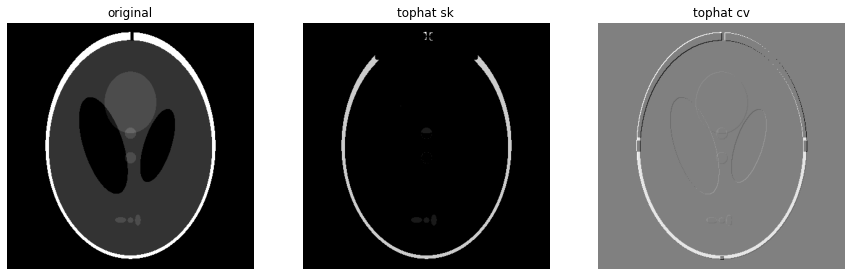

In [55]:
#3k=np.ones((5,5),np.uint8)
kernerl=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
dist=skimage.morphology.disk(5)

wt1=cv2.morphologyEx(phantom,cv2.MORPH_TOPHAT,kernel)
wt2=skimage.morphology.white_tophat(phantom,dist)
plot_comparison(phantom,wt2,wt1,'tophat sk','tophat cv')

# Black tophat
The black_tophat of an image is the difference between the closing of the input image and input image

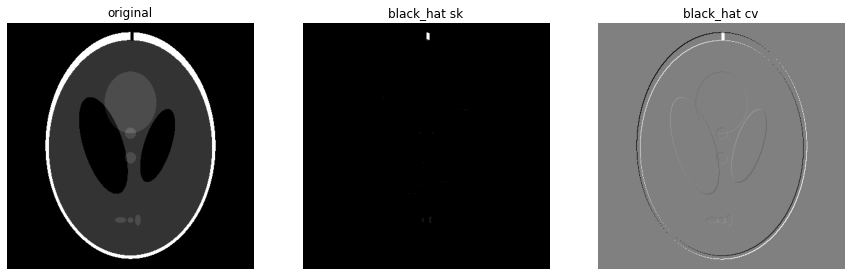

In [56]:
kernel=np.ones((6,6),np.uint8)
dist=skimage.morphology.disk(6)
b1=cv2.morphologyEx(phantom,cv2.MORPH_BLACKHAT,kernel)
b2=skimage.morphology.black_tophat(phantom,dist)
plot_comparison(phantom,b2,b1,'black_hat sk','black_hat cv')

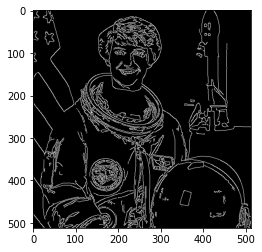

In [57]:
edge=cv2.Canny(gray_astronaut,100,200)
plt.imshow(edge)

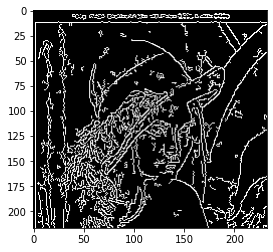

In [58]:
edge=cv2.Canny(gray_img,100,200)
plt.imshow(edge)


[Morphological Filtering](https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html#sphx-glr-auto-examples-applications-plot-morphology-py)

[First Principles of Computer Vision by Prof Shree K. Nayar](https://www.youtube.com/channel/UCf0WB91t8Ky6AuYcQV0CcLw/playlists)

[Linear time-invariant system](https://en.wikipedia.org/wiki/Linear_time-invariant_system)

[2.2. Convolution](https://staff.fnwi.uva.nl/r.vandenboomgaard/SP20162017/LinearSystems/lin_ti_convolution.html)

[scikit-image](https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html#sphx-glr-download-auto-examples-applications-plot-thresholding-py)

[Opencv](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)

[Opencv](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)